# **First Exploratory data analysis and then Different CUML model building**

**Import Libraries for EDA**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Exploring Data**
**like exploring non-null count and datatype of entries of each column**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
data.duplicated().sum()

0

# **Finding the exhaustive set of values for each column**

In [6]:
for column in data.columns:
    print('Column: {} - Unique Values: {}'.format(column, data[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

 ***Dropping customer id as it's non_contributing feature that don't affect churn value***

In [7]:
data.drop('customerID', axis = 1, inplace=True)

In [8]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [9]:
data['TotalCharges'].isnull().sum()

11

In [10]:
data[data['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


# **Dropping null values**

In [11]:
data.dropna(inplace=True)

# **Encoding Churn**

In [12]:
data.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [13]:
data.Churn = data.Churn.map({'No': 0, 'Yes':1})

In [14]:
data.Churn.unique()

array([0, 1])

# **Data Visualization Functions**

In [15]:

def data_visual_column(column):
    d= pd.DataFrame(data.groupby(column).mean()['Churn']).reset_index()
    fig , axes = plt.subplots(1,3, figsize=(20,5))
    axes[0].pie(data[column].value_counts(), labels = data[column].unique(), autopct='%.00f%%')
    sns.countplot(ax= axes[1], data = data, x= column, hue='Churn')
    axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation = 30)
    sns.barplot(ax= axes[2],data = d, x= column, y= 'Churn')
    axes[2].set_xticklabels(axes[2].get_xticklabels(),rotation = 30)
    fig.suptitle(f'Exploring using Visualization on "{column}"')
    
def visual_num(column):
    sns.histplot(data=data, x= column, hue = 'Churn')
    plt.show()

**Gender Column**

In [16]:
data.gender.value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [17]:
data.groupby('gender').mean()['Churn']

gender
Female    0.269595
Male      0.262046
Name: Churn, dtype: float64

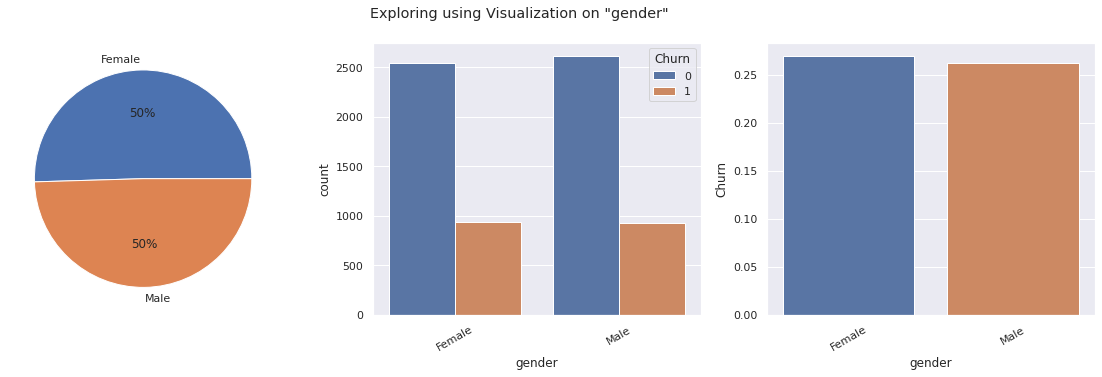

In [18]:
data_visual_column('gender')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


# **FOR ALL COLUMNS**

**List of all column values except churn**

In [20]:
All_columns=list(data.iloc[:,:-1])
All_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

# **Exploring every categorical column which don't contribute in numbers(numeric) and weight accordingly**

# Here I choosed categorical column using columns with unique value count less than 10

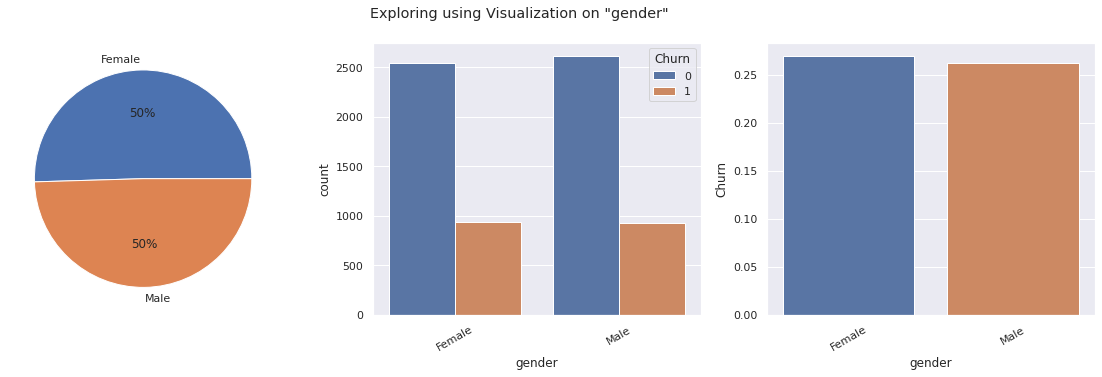

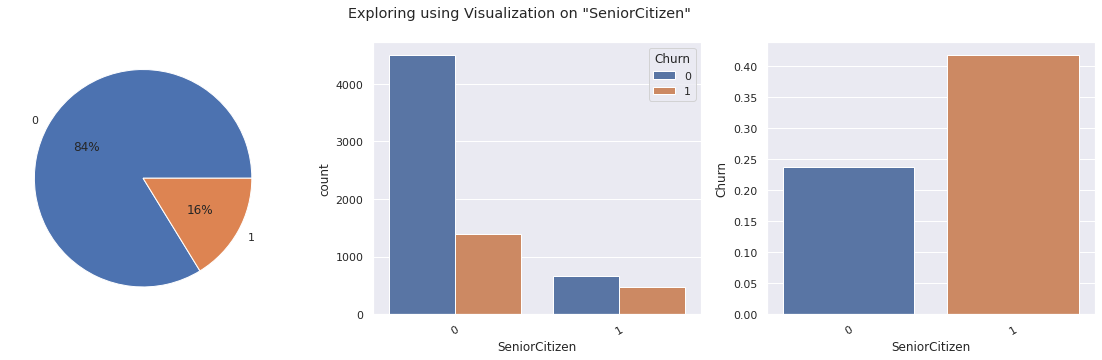

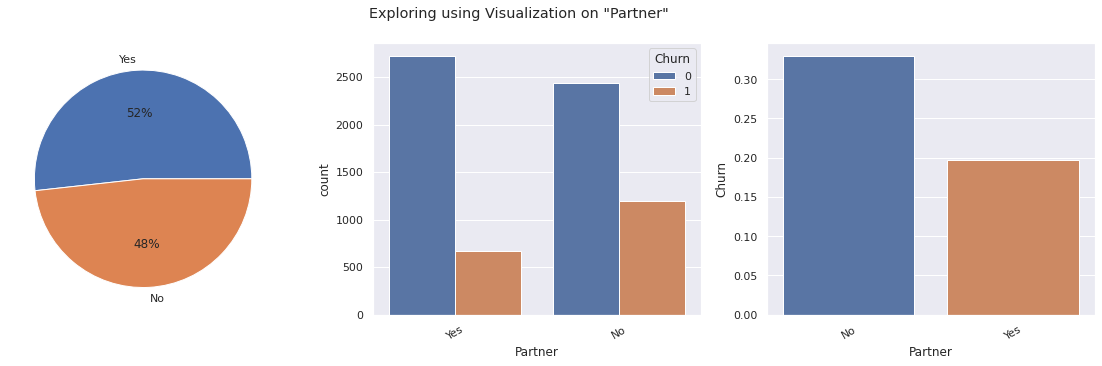

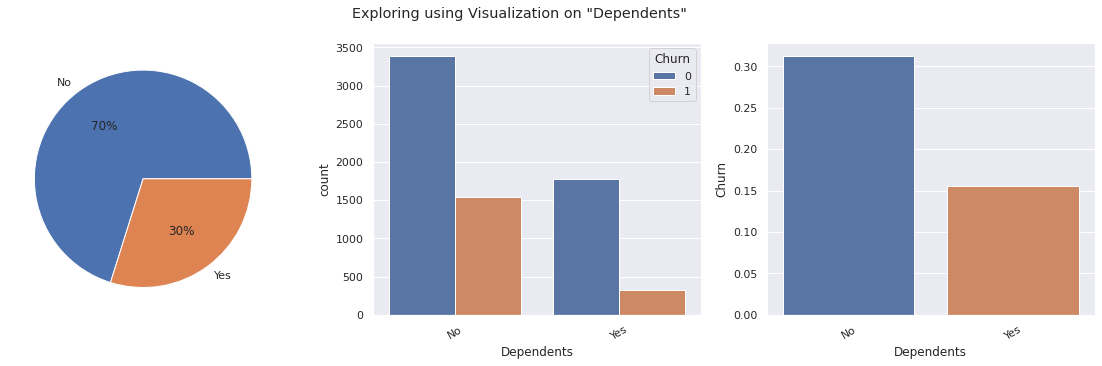

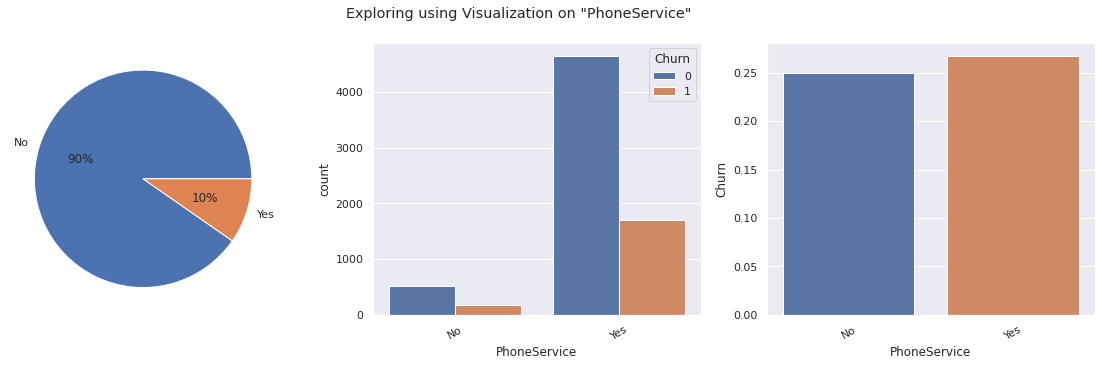

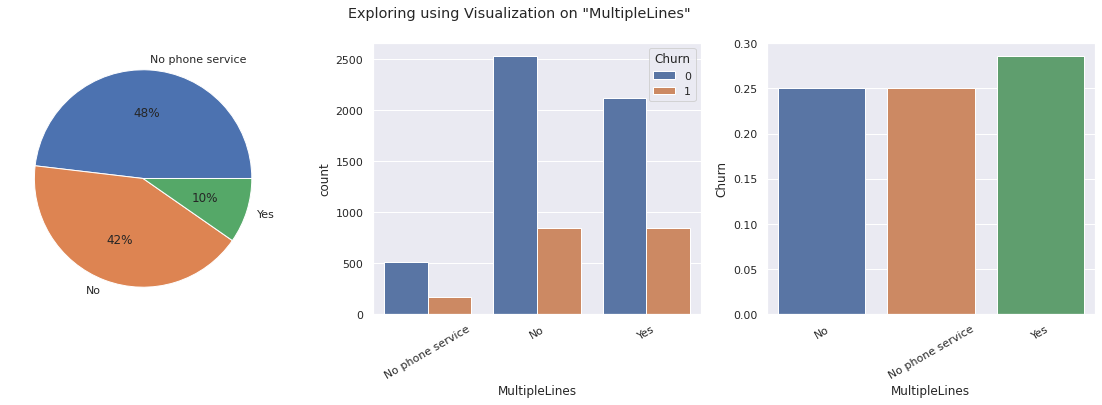

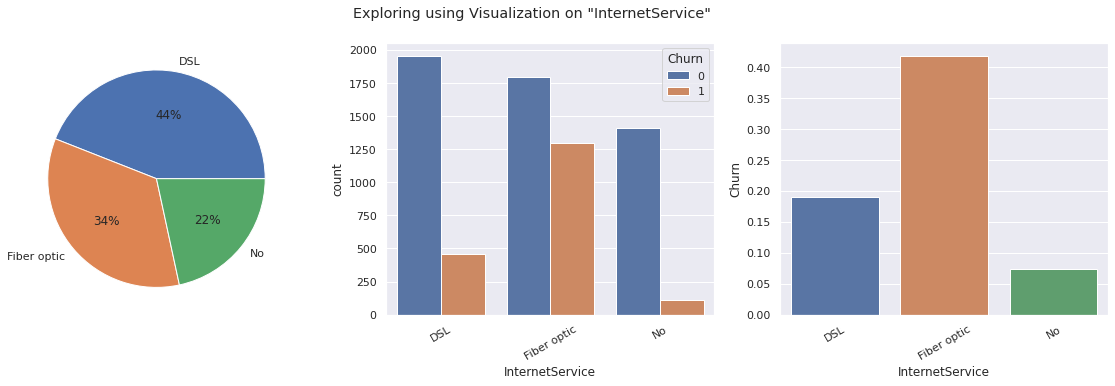

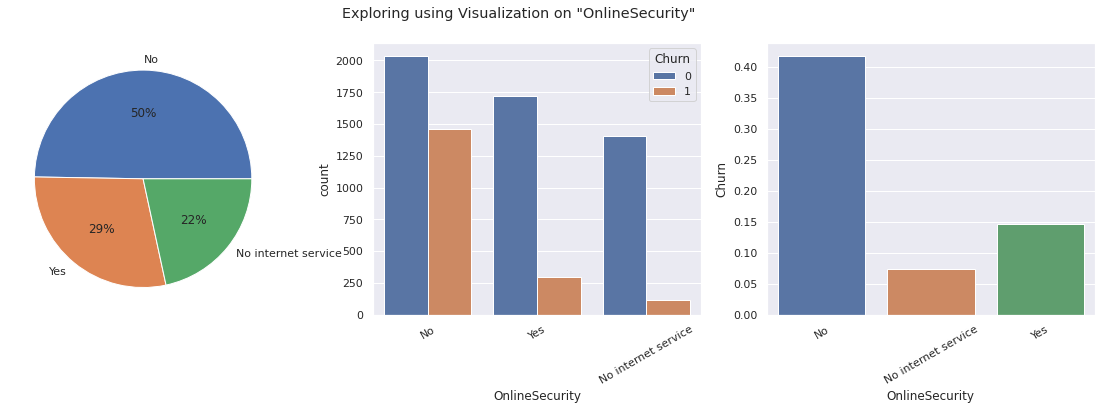

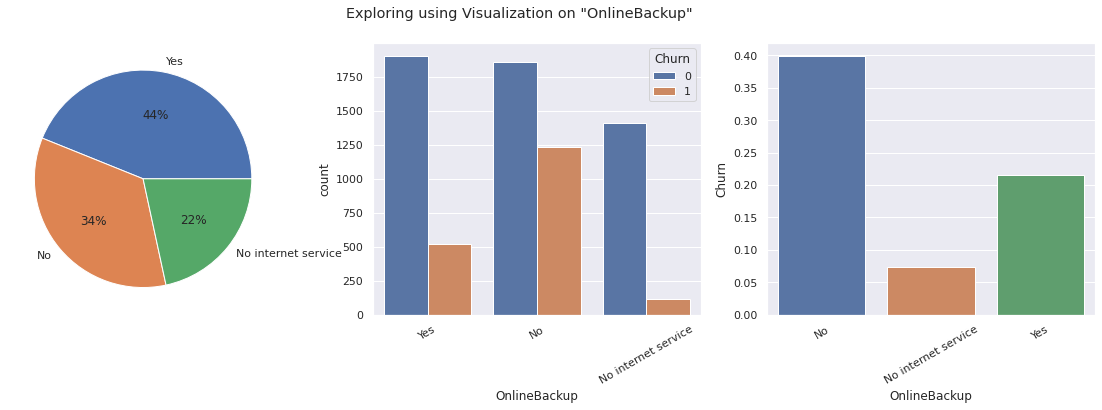

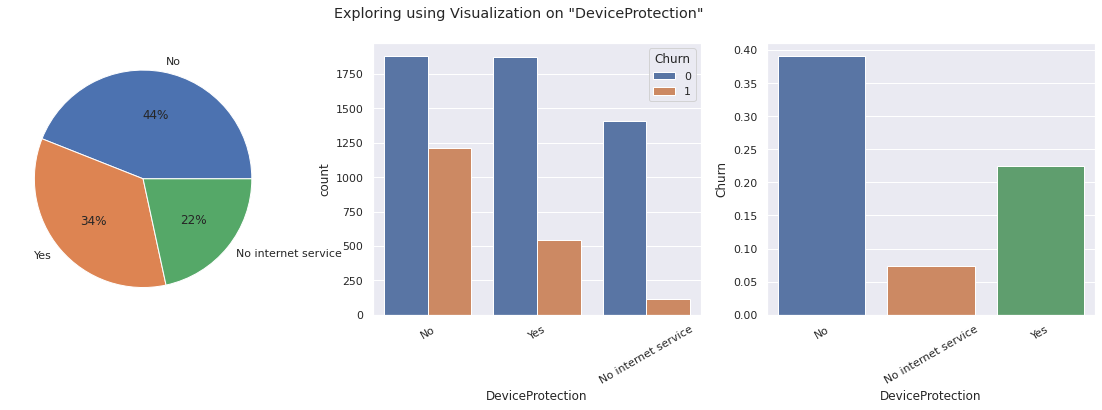

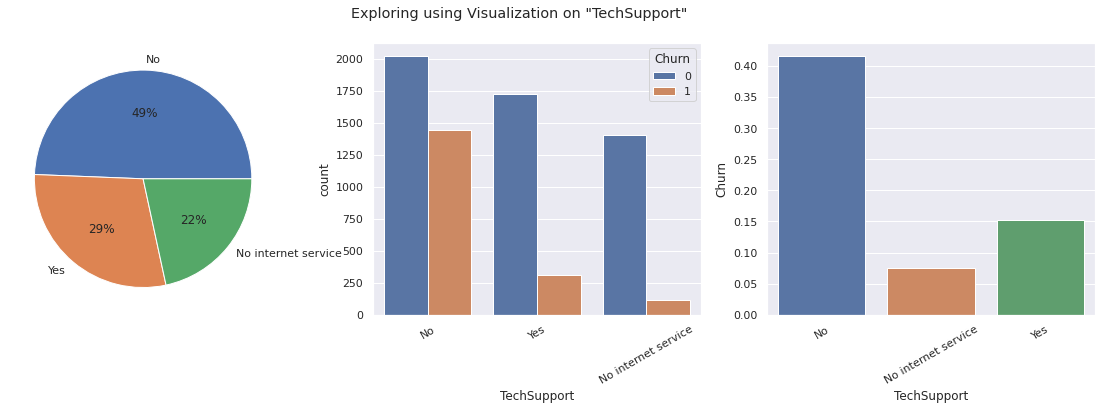

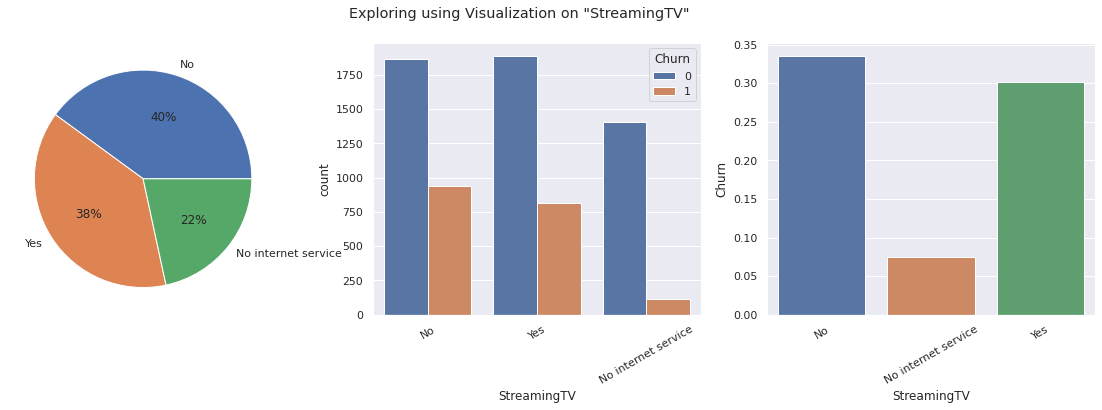

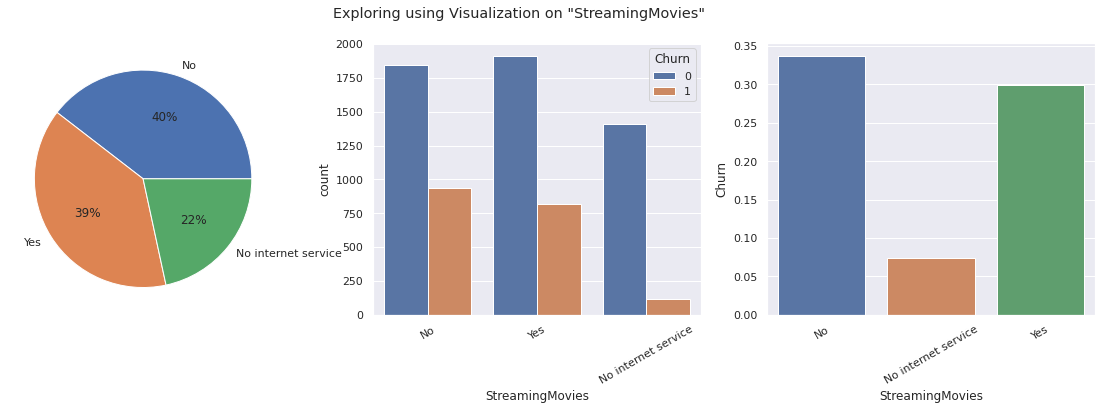

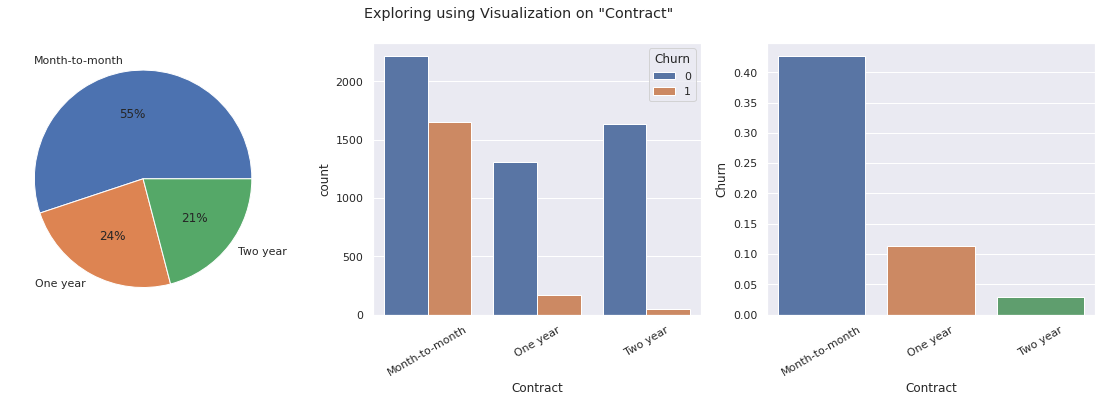

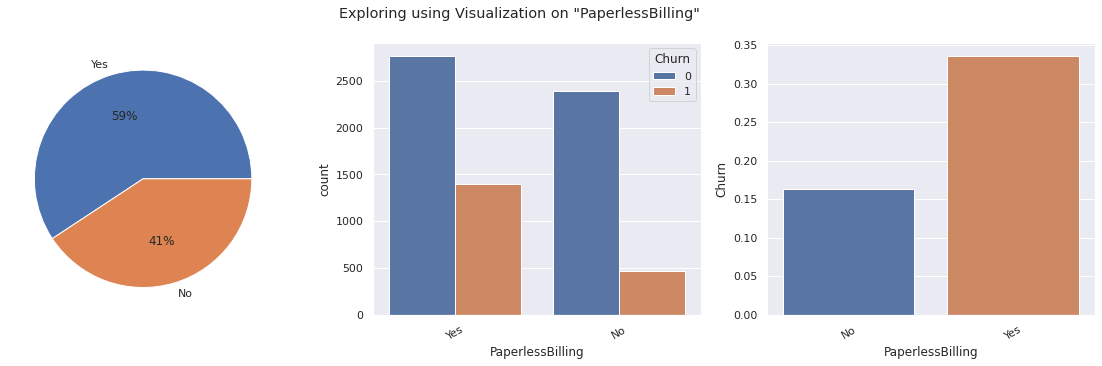

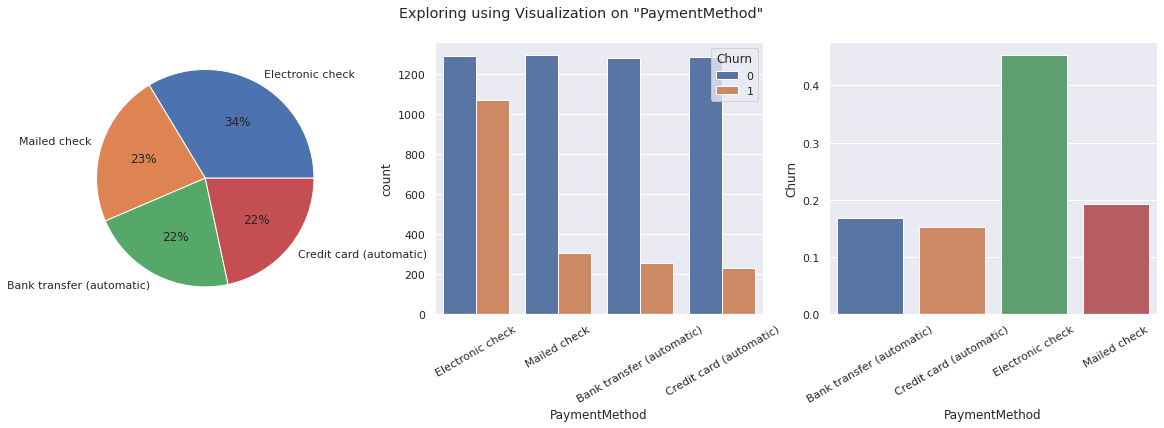

In [21]:
for columns in All_columns:
    if(len(pd.unique(data[columns]))<10):
        data_visual_column(columns)

# **Exploring non-categorical column**

**Numerical Account Info**

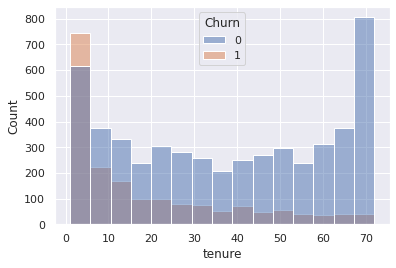

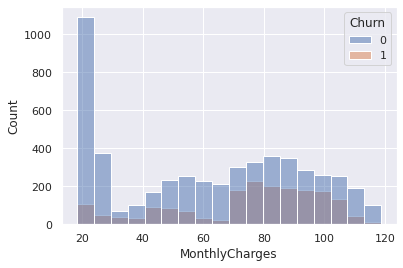

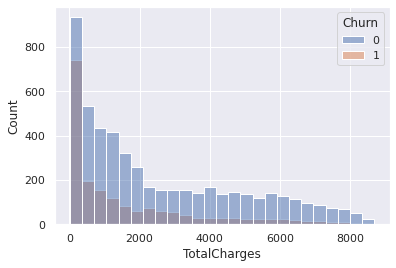

In [22]:
for columns in All_columns:
    if(len(pd.unique(data[columns]))>=10):
        visual_num(columns)

In [23]:
# function that computes the mutual infomation score between a categorical serie and the column Churn
def compute_mutual_information(categorical_serie):
    from sklearn.metrics import mutual_info_score
    return mutual_info_score(categorical_serie, data.Churn)

# select categorial variables excluding the response variable 
categorical_variables = data.select_dtypes(include=object)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


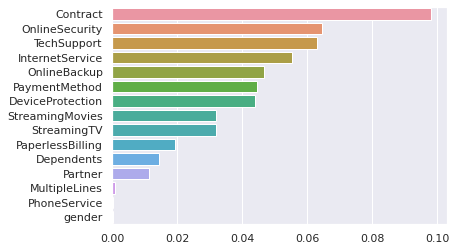

In [24]:
sns.barplot(x=feature_importance.values, y= feature_importance.index);

#   **Now Preprocessing and model building task using Rapids Library cudf,cupy and cuml**

# Importing Rapids equivalent of numpy and pandas: cupy and cudf

In [25]:
import cupy as np
import cudf as pd

In [26]:
df=pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [27]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
df.shape

(7043, 21)

In [29]:
df.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod   

In [30]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [31]:
df.describe(include=['object', 'bool'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,9146-JRIOX,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [32]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int32

In [33]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int32

In [34]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Encoding churn values

In [35]:
#changing Churn column values to 1 and 0 for analysis purpose
df['Churn']=df['Churn'].replace('No',"0")
df['Churn']=df['Churn'].replace('Yes',"1")
df['Churn']=pd.to_numeric(df['Churn'])

In [36]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [37]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: uint64

In [38]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: uint64

In [39]:
#Defining categorical variables
categorical_features=df.select_dtypes(include=[object])

In [40]:
categorical_features.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [41]:
# Removing unwanted coloumns
df.drop(['customerID'],axis=1,inplace=True)

In [42]:
df.TotalCharges.isnull().sum()

0

In [43]:
#Imputing NA values of TotalCharges with median
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

In [44]:
df.TotalCharges.isnull().sum()

0

In [45]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

# **Tokenizing Every Column so that it can be fed directly to the model**

In [46]:
df['gender']=df['gender'].replace('Male','1')
df['gender']=df['gender'].replace('Female','0')
df['gender']=pd.to_numeric(df['gender'])

In [47]:
df['Partner']=df['Partner'].replace('No','0')
df['Partner']=df['Partner'].replace('Yes','1')
df['Partner']=pd.to_numeric(df['Partner'])

In [48]:
df['Dependents']=df['Dependents'].replace('No','0')
df['Dependents']=df['Dependents'].replace('Yes','1')
df['Dependents']=pd.to_numeric(df['Dependents'])

In [49]:
df['PhoneService']=df['PhoneService'].replace('No','0')
df['PhoneService']=df['PhoneService'].replace('Yes','1')
df['PhoneService']=pd.to_numeric(df['PhoneService'])

In [50]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [51]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

# Making one hot encoding for each categorical column

In [52]:
from cuml.preprocessing import OneHotEncoder
oe=OneHotEncoder()

In [53]:
final_df=pd.get_dummies(df,columns=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])

# Final shape of dataset

In [54]:
final_df.shape

(7043, 42)

In [55]:
final_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,29.85,29.85,0,0,...,0,1,0,0,0,1,0,0,1,0
1,1,0,0,0,34,1,56.95,1889.50,0,1,...,0,0,1,0,1,0,0,0,0,1
2,1,0,0,0,2,1,53.85,108.15,1,1,...,0,1,0,0,0,1,0,0,0,1
3,1,0,0,0,45,0,42.30,1840.75,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,0,0,0,2,1,70.70,151.65,1,1,...,0,1,0,0,0,1,0,0,1,0


In [56]:
final_df.shape

(7043, 42)

# Separating X(features) and Y(class) columns of dataset

In [57]:
y=final_df['Churn']

In [58]:
X=final_df.drop(['Churn'],axis=1)

# Splitting dataset into train and test dataset

In [59]:
from cuml.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [61]:
X_train.shape

(4931, 41)

In [62]:
X_test.shape

(2112, 41)

In [63]:
y_test.shape

(2112,)

In [64]:
y_train.shape

(4931,)

In [65]:
X.shape

(7043, 41)

In [66]:
final_df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet service           uint8
OnlineSecurity_Yes                           uint8
OnlineBackup_No                              uint8
OnlineBackup_No internet servic

# **Logistic Regression Model**

In [67]:
from cuml.linear_model import LogisticRegression

In [68]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [69]:
lr.score(X_train,y_train)

0.8042993545532227

In [70]:
lr_predict=lr.predict(X_test)

In [71]:
from cuml.metrics import confusion_matrix
from cuml import metrics

In [72]:
cm=confusion_matrix(y_test,lr_predict)
cm

array([[1407,  134],
       [ 271,  300]])

Heatmap of confusion matrix for Logistic regression

<AxesSubplot:>

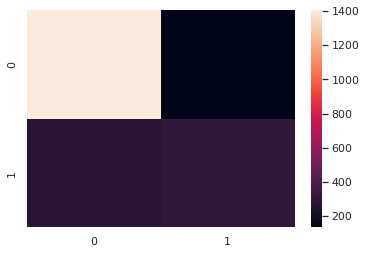

In [73]:
sns.heatmap(np.asnumpy(cm))

In [74]:
metrics.accuracy_score(y_test,lr_predict)

0.8082386255264282

In [75]:
metrics.roc_auc_score(y_test,lr_predict)


0.7192187905311584

In [76]:
print('Actual:', y_test.values[0:25])
print('Predicted:', lr_predict.values[0:25])

Actual: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0]
Predicted: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0]


# **Random Forest Model**

In [77]:
from cuml.ensemble import RandomForestClassifier
rf=RandomForestClassifier(split_criterion='entropy',n_estimators=1000,max_depth=100,random_state=42)

/opt/conda/lib/python3.7/site-packages/cuml/internals/api_decorators.py:794: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams==1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)


In [78]:
rf.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


RandomForestClassifier()

In [79]:
rf.score(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/cuml/internals/api_decorators.py:586: UserWarning: GPU based predict only accepts np.float32 data. The model was trained on np.float64 data hence cannot use GPU-based prediction! 
Defaulting to CPU-based Prediction. 
To predict on float-64 data, set parameter predict_model = 'CPU'
  ret_val = func(*args, **kwargs)


0.9728249907493591

In [80]:
rf_predict=rf.predict(X_test)

In [81]:
RF_CM=metrics.confusion_matrix(y_test,rf_predict)
RF_CM

array([[1402,  139],
       [ 296,  275]])

**Heatmap for confusion matrix of Random forest**

<AxesSubplot:>

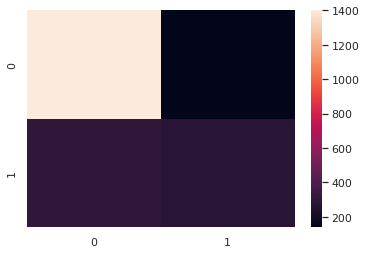

In [82]:
sns.heatmap(np.asnumpy(RF_CM))

In [83]:
print("FOR Random forest")
print('Actual:', y_test.values[0:25])
print('Predicted:', lr_predict.values[0:25])

FOR Random forest
Actual: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0]
Predicted: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0]


In [84]:
metrics.accuracy_score(y_test,rf_predict)

0.7940340638160706

# **Multinomail Naive Bayes**

In [85]:
from cuml.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

# Compute accuracy on training set

model.score(X_train, y_train)

0.6820117831230164

In [86]:
mnb_predict=model.predict(X_test)

In [87]:
mnb_CM=metrics.confusion_matrix(y_test,mnb_predict)
mnb_CM

array([[1017,  524],
       [ 159,  412]])

<AxesSubplot:>

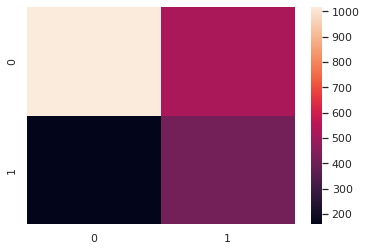

In [88]:
sns.heatmap(np.asnumpy(mnb_CM))

In [89]:
print("FOR MultinomialNB")
print('Actual:', y_test.values[0:25])
print('Predicted:', mnb_predict.values[0:25])

FOR MultinomialNB
Actual: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0]
Predicted: [0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0]


In [90]:
metrics.accuracy_score(y_test,mnb_predict)

0.6766098737716675

# **K_nearest neighbour**

In [91]:
from cuml.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [92]:
KNN.score(X_train,y_train)

0.8578381538391113

In [93]:
knn_predict=model.predict(X_test)

In [94]:
knn_CM=metrics.confusion_matrix(y_test,knn_predict)
knn_CM

array([[1017,  524],
       [ 159,  412]])

<AxesSubplot:>

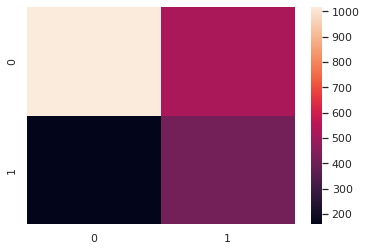

In [95]:
sns.heatmap(np.asnumpy(knn_CM))

In [96]:
print("FOR KNN")
print('Actual:', y_test.values[0:25])
print('Predicted:', knn_predict.values[0:25])

FOR KNN
Actual: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0]
Predicted: [0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0]


In [97]:
metrics.accuracy_score(y_test,knn_predict)

0.6766098737716675